In [1]:
# Link to the dataset https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
# Please save in same location as this Jupyter notebook file

# Import os & pandas to load dataset into a dataframe
import os
import pandas as pd

# Load dataset into a dataframe & print
path = "."
filename_read = os.path.join(path, "heart_2020_cleaned.csv")
Heart_b = pd.read_csv(filename_read)
print(Heart_b)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [2]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Import sklearn models & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, PrecisionRecallDisplay

# Import numpy, matplotlib & seaborn for plots
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Check for no blank cells
Heart_b.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
# Replace strings with numerical values - binary (1,0) instead of (yes,no)
Heart_b.Smoking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Stroke.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.Sex.replace(('Male','Female'), (1,0), inplace = True)
Heart_b.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (1,0,0,0), inplace = True)
Heart_b.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)
Heart_b.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (21,27,32,37,42,47,52,57,62,67,72,77,82), inplace = True)
Heart_b.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (5,4,3,2,1), inplace = True)
Heart_b.DiffWalking.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Asthma.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.KidneyDisease.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.SkinCancer.replace(('Yes','No'), (1,0), inplace =True)
Heart_b.Race.replace(('White', 'Black', 'Asian', 'American Indian/Alaskan Native' ,'Other','Hispanic'),(0,1,1,1,0,1), inplace=True)
Heart_b.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,82,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,0,0,1,4,8.0,0,0,0


In [5]:
#Split the data
X = Heart_b.drop(['HeartDisease'],axis=1).values
y = Heart_b['HeartDisease'].values

# Apply Train-Test split 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=100, stratify=y)

# Apply SMOTE
sm = SMOTE(random_state=0)
sm.fit(X_train,y_train)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape,y_train.shape)

(409390, 17) (409390,)


[[80388  7339]
 [ 6115  2097]]
[[0.91634275 0.08365725]
 [0.74464199 0.25535801]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     87727
           1       0.22      0.26      0.24      8212

    accuracy                           0.86     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.86      0.86     95939

accuracy: 0.86
  recall: 0.26


<Figure size 640x480 with 0 Axes>

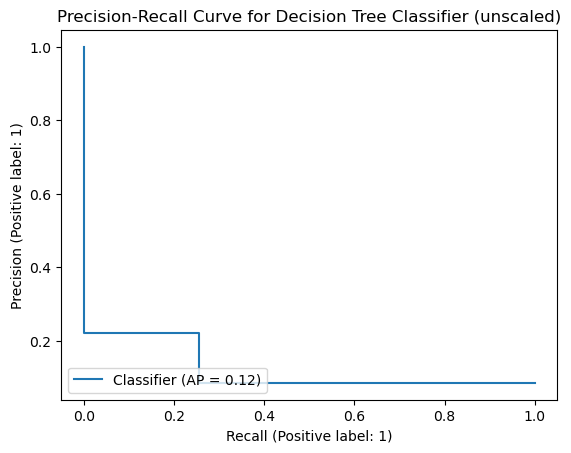

Text(0.5, 0, 'Predicted label')

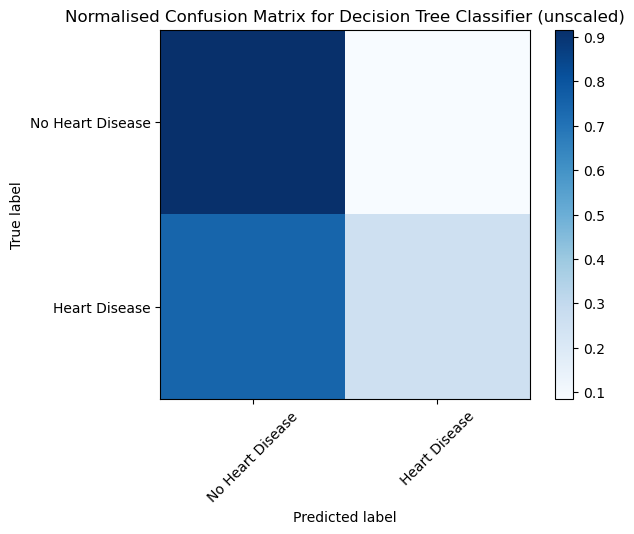

In [6]:
# Decision Tree model (unscaled)

# Train Decision Tree
Decision_tree = DecisionTreeClassifier(criterion ='entropy', random_state=100)
Decision_tree.fit(X_train,y_train)
y_pred = Decision_tree.predict(X_test)

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classificationreport = classification_report(y_test, y_pred)

# Print confusion matrix, classification report, accuracy & recall and plot precision-recall curve
print(cm)
print(cm_normalised)
print(classification_report(y_test,y_pred))
print('accuracy: %.2f'%accuracy_score(y_test, y_pred))
print('  recall: %.2f'%recall_score(y_test, y_pred))
plt.figure()
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve for Decision Tree Classifier (unscaled)")
plt.show()

# Plot normalised confusion matrix
plt.figure()
plt.imshow(cm_normalised, interpolation='nearest', cmap='Blues')
plt.title("Normalised Confusion Matrix for Decision Tree Classifier (unscaled)")
plt.colorbar(fraction=0.05)
tick_marks = np.arange(2)
names = ['No Heart Disease', 'Heart Disease']
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[68113 19614]
 [ 2540  5672]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     87727
           1       0.22      0.69      0.34      8212

    accuracy                           0.77     95939
   macro avg       0.59      0.73      0.60     95939
weighted avg       0.90      0.77      0.82     95939

accuracy: 0.77
  recall: 0.69


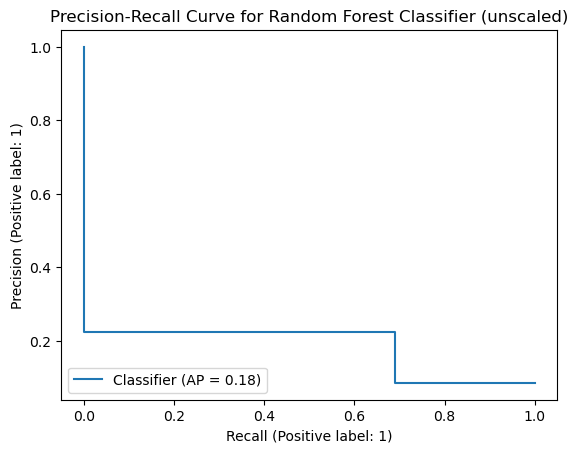

Text(0.5, 0, 'Predicted label')

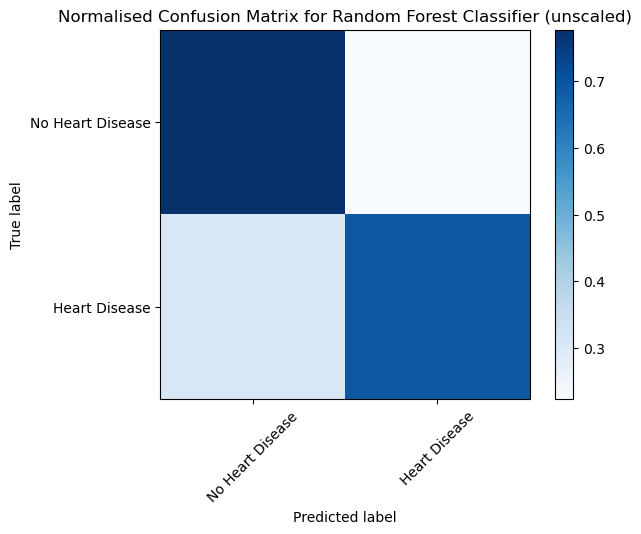

In [7]:
# Random Forest model (unscaled)

# Train Random Forest
Random_forest = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=100)
Random_forest.fit(X_train,y_train)
y_pred = Random_forest.predict(X_test)

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classificationreport = classification_report(y_test, y_pred)

# Print confusion matrix, classification report, accuracy & recall and plot precision-recall curve
print(cm)
print(classification_report(y_test,y_pred))
print('accuracy: %.2f'%accuracy_score(y_test, y_pred))
print('  recall: %.2f'%recall_score(y_test, y_pred))
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve for Random Forest Classifier (unscaled)")
plt.show()

# Plot normalised confusion matrix
plt.figure()
plt.imshow(cm_normalised, interpolation='nearest', cmap='Blues')
plt.title("Normalised Confusion Matrix for Random Forest Classifier (unscaled)")
plt.colorbar(fraction=0.05)
tick_marks = np.arange(2)
names = ['No Heart Disease', 'Heart Disease']
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[58832 28895]
 [ 1695  6517]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     87727
           1       0.18      0.79      0.30      8212

    accuracy                           0.68     95939
   macro avg       0.58      0.73      0.55     95939
weighted avg       0.90      0.68      0.75     95939

accuracy: 0.68
  recall: 0.79


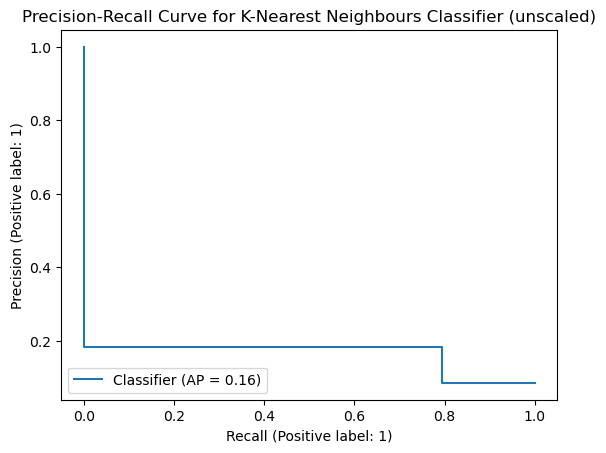

Text(0.5, 0, 'Predicted label')

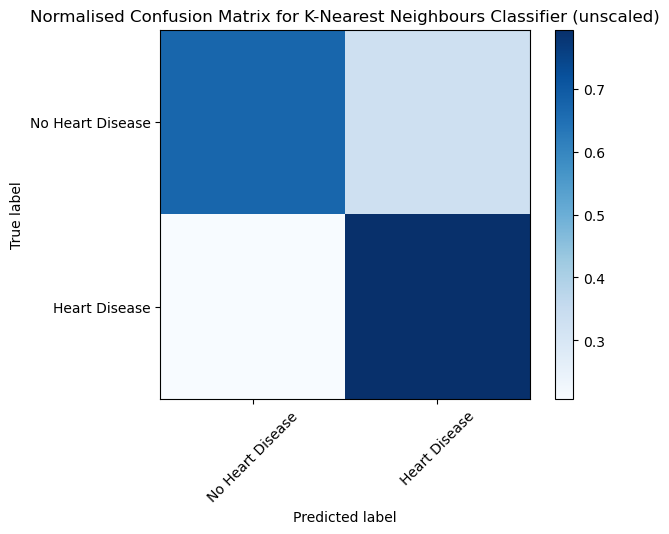

In [8]:
# K-Nearest Neighbours model (unscaled)

# Train K-Nearest Neighbours
KNN = KNeighborsClassifier(n_neighbors=100)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classificationreport = classification_report(y_test, y_pred)

# Print confusion matrix, classification report, accuracy & recall and plot precision-recall curve
print(cm)
print(classification_report(y_test,y_pred))
print('accuracy: %.2f'%accuracy_score(y_test, y_pred))
print('  recall: %.2f'%recall_score(y_test, y_pred))
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve for K-Nearest Neighbours Classifier (unscaled)")
plt.show()

# Plot normalised confusion matrix
plt.figure()
plt.imshow(cm_normalised, interpolation='nearest', cmap='Blues')
plt.title("Normalised Confusion Matrix for K-Nearest Neighbours Classifier (unscaled)")
plt.colorbar(fraction=0.05)
tick_marks = np.arange(2)
names = ['No Heart Disease', 'Heart Disease']
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [9]:
# Scale the data

StSc = StandardScaler()
X = StSc.fit_transform(X)

# Apply Train-Test split 70/30
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size=0.30, random_state=42, stratify=y )

# Apply SMOTE
sm = SMOTE(random_state = 1)
sm.fit(X_train, y_train)
X_train, y_train= sm.fit_resample(X_train, y_train)
print(X_train.shape,y_train.shape)
print(X_train[:5])

(409390, 17) (409390,)
[[-0.76861692  1.19347355 -0.27031975 -0.19804029 -0.42406978 -0.36433501
  -0.40157831 -0.95171093  0.69617576 -0.49851423 -0.38242306  0.53825606
  -0.57054245 -0.06760053 -0.39346613 -0.19555439 -0.3206753 ]
 [-0.82053563 -0.83789038 -0.27031975 -0.19804029 -0.42406978 -0.49003859
  -0.40157831  1.05073922  0.41755361 -0.49851423 -0.38242306 -1.85785181
   1.34715683 -0.06760053 -0.39346613 -0.19555439 -0.3206753 ]
 [ 1.13034919 -0.83789038 -0.27031975 -0.19804029 -0.17252396 -0.36433501
  -0.40157831 -0.95171093  1.25342005  2.0059608  -0.38242306  0.53825606
  -0.57054245 -0.06760053 -0.39346613 -0.19555439 -0.3206753 ]
 [-1.02821046 -0.83789038 -0.27031975 -0.19804029 -0.42406978 -0.49003859
  -0.40157831 -0.95171093 -0.13969068 -0.49851423 -0.38242306  0.53825606
   1.34715683  0.62877596 -0.39346613 -0.19555439 -0.3206753 ]
 [ 3.03088859  1.19347355 -0.27031975 -0.19804029  3.34911752  2.02403305
   2.49017434  1.05073922 -0.41831282 -0.49851423 -0.382423

[[79391  8336]
 [ 5996  2216]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87727
           1       0.21      0.27      0.24      8212

    accuracy                           0.85     95939
   macro avg       0.57      0.59      0.58     95939
weighted avg       0.87      0.85      0.86     95939

accuracy: 0.85
  recall: 0.27


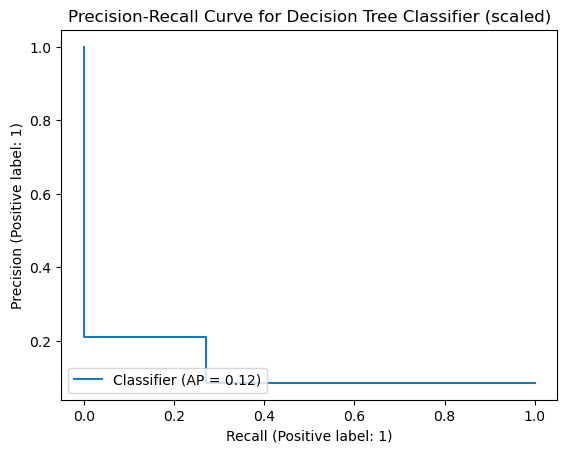

Text(0.5, 0, 'Predicted label')

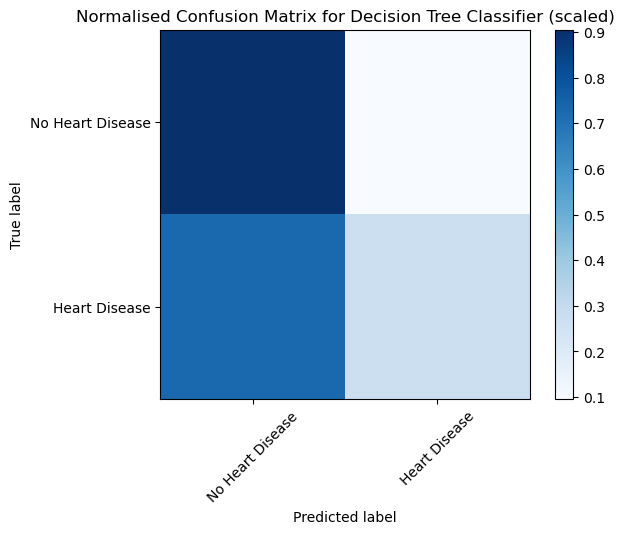

In [10]:
# Decision Tree model (scaled)

# Train Decision Tree
Decision_tree_scaled = DecisionTreeClassifier(criterion ='entropy', random_state=42)
Decision_tree_scaled.fit(X_train,y_train)
y_pred = Decision_tree_scaled.predict(X_test)

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classificationreport = classification_report(y_test, y_pred)

# Print confusion matrix, classification report, accuracy & recall and plot precision-recall curve
print(cm)
print(classification_report(y_test,y_pred))
print('accuracy: %.2f'%accuracy_score(y_test, y_pred))
print('  recall: %.2f'%recall_score(y_test, y_pred))
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve for Decision Tree Classifier (scaled)")
plt.show()

# Plot normalised confusion matrix
plt.figure()
plt.imshow(cm_normalised, interpolation='nearest', cmap='Blues')
plt.title("Normalised Confusion Matrix for Decision Tree Classifier (scaled)")
plt.colorbar(fraction=0.05)
tick_marks = np.arange(2)
names = ['No Heart Disease', 'Heart Disease']
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[66275 21452]
 [ 2242  5970]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     87727
           1       0.22      0.73      0.34      8212

    accuracy                           0.75     95939
   macro avg       0.59      0.74      0.59     95939
weighted avg       0.90      0.75      0.80     95939

accuracy: 0.75
  recall: 0.73


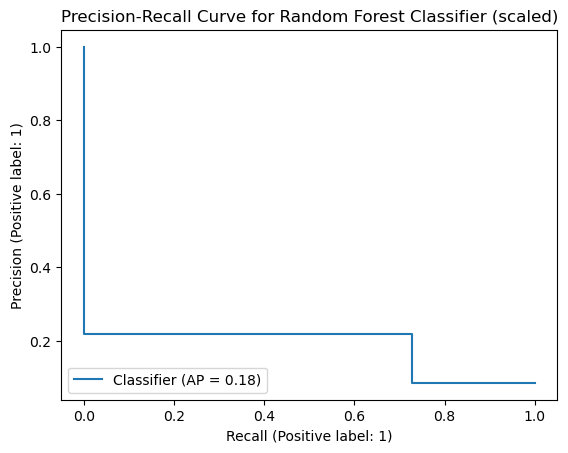

Text(0.5, 0, 'Predicted label')

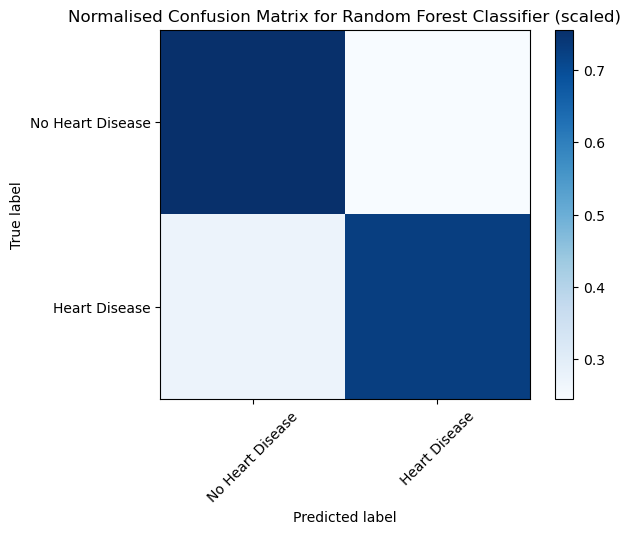

In [11]:
# Random Forest model (scaled)

# Train Random Forest
Random_forest_scaled = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
Random_forest_scaled.fit(X_train,y_train)
y_pred = Random_forest_scaled.predict(X_test)

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classificationreport = classification_report(y_test, y_pred)

# Print confusion matrix, classification report, accuracy & recall and plot precision-recall curve
print(cm)
print(classification_report(y_test,y_pred))
print('accuracy: %.2f'%accuracy_score(y_test, y_pred))
print('  recall: %.2f'%recall_score(y_test, y_pred))
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve for Random Forest Classifier (scaled)")
plt.show()

# Plot normalised confusion matrix
plt.figure()
plt.imshow(cm_normalised, interpolation='nearest', cmap='Blues')
plt.title("Normalised Confusion Matrix for Random Forest Classifier (scaled)")
plt.colorbar(fraction=0.05)
tick_marks = np.arange(2)
names = ['No Heart Disease', 'Heart Disease']
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

[[61057 26670]
 [ 1681  6531]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     87727
           1       0.20      0.80      0.32      8212

    accuracy                           0.70     95939
   macro avg       0.58      0.75      0.56     95939
weighted avg       0.91      0.70      0.77     95939

accuracy: 0.70
  recall: 0.80


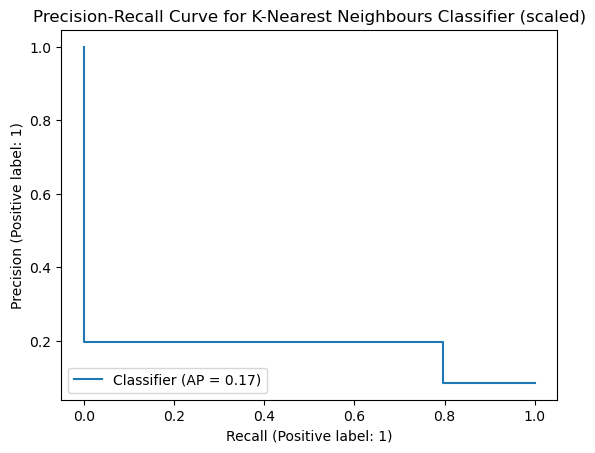

Text(0.5, 0, 'Predicted label')

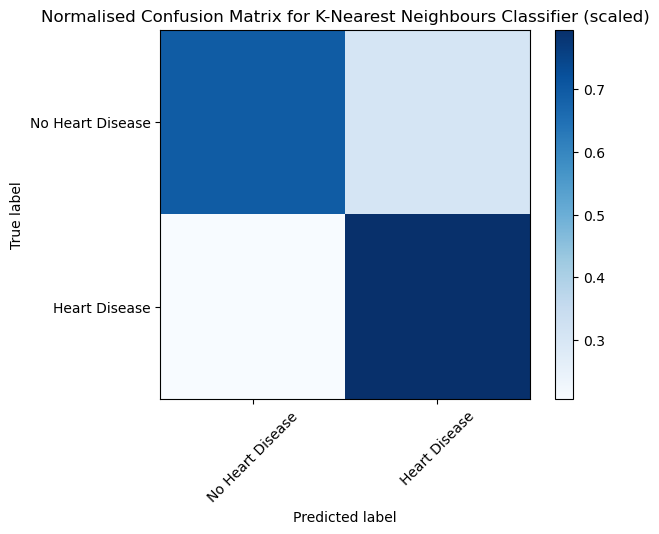

In [12]:
# K-Nearest Neighbours model (scaled)

# Train K-Nearest Neighbours
KNN_scaled = KNeighborsClassifier(n_neighbors=100)
KNN_scaled.fit(X_train,y_train)
y_pred = KNN_scaled.predict(X_test)

# Compute metrics
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classificationreport = classification_report(y_test, y_pred)

# Print confusion matrix, classification report, accuracy & recall and plot precision-recall curve
print(cm)
print(classification_report(y_test,y_pred))
print('accuracy: %.2f'%accuracy_score(y_test, y_pred))
print('  recall: %.2f'%recall_score(y_test, y_pred))
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.title("Precision-Recall Curve for K-Nearest Neighbours Classifier (scaled)")
plt.show()

# Plot normalised confusion matrix
plt.figure()
plt.imshow(cm_normalised, interpolation='nearest', cmap='Blues')
plt.title("Normalised Confusion Matrix for K-Nearest Neighbours Classifier (scaled)")
plt.colorbar(fraction=0.05)
tick_marks = np.arange(2)
names = ['No Heart Disease', 'Heart Disease']
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')